# Results Analysis

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Single Agent

In [6]:
df1 = pd.read_csv("Results/single_1.csv")
df2 = pd.read_csv("Results/single_2.csv")

df1['Setting'] = 'Normal'
df2['Setting'] = 'Swapped'

df = pd.concat([df1, df2], ignore_index=True)

print(df.info())
print(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   system_decision  20 non-null     object
 1   ground_truth     20 non-null     object
 2   is_correct       20 non-null     bool  
 3   Setting          20 non-null     object
dtypes: bool(1), object(3)
memory usage: 632.0+ bytes
None
  system_decision ground_truth  is_correct Setting
0               B            B        True  Normal


### Analysis

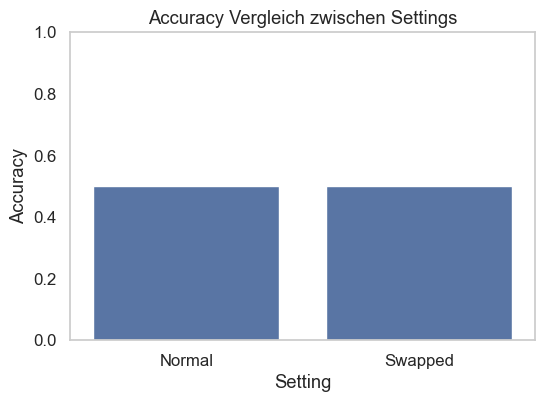

In [10]:
accuracy = df.groupby('Setting')['is_correct'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Setting', y='is_correct', data=accuracy)
plt.ylabel('Accuracy')
plt.title('Accuracy Vergleich zwischen Settings')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

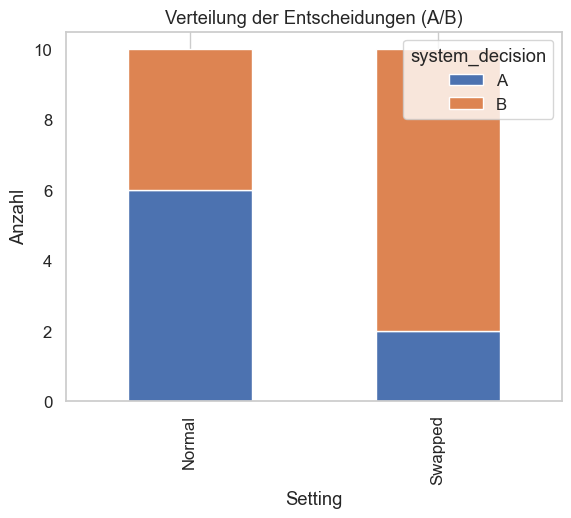

In [11]:
decision_counts = df.groupby(['Setting', 'system_decision']).size().unstack()

decision_counts.plot(kind='bar', stacked=True)
plt.title('Verteilung der Entscheidungen (A/B)')
plt.ylabel('Anzahl')
plt.grid(axis='y')
plt.show()

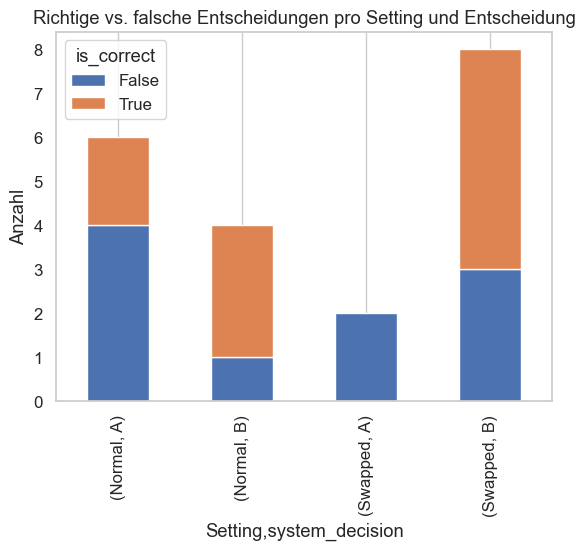

In [12]:
correct_by_decision = df.groupby(['Setting', 'system_decision', 'is_correct']).size().unstack().fillna(0)

correct_by_decision.plot(kind='bar', stacked=True)
plt.title('Richtige vs. falsche Entscheidungen pro Setting und Entscheidung')
plt.ylabel('Anzahl')
plt.grid(axis='y')
plt.show()

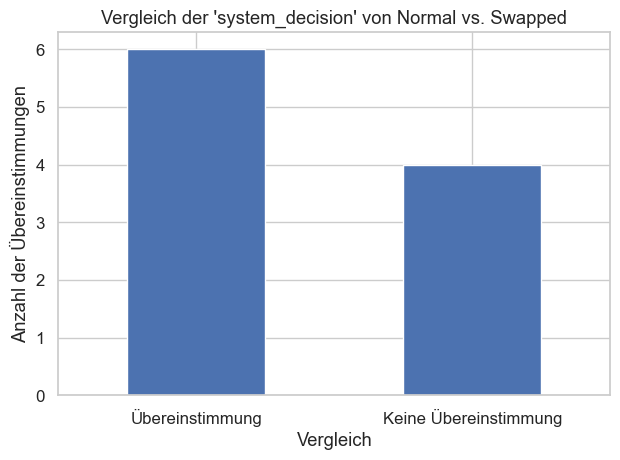

In [17]:
matches = df1['system_decision'] == df2['system_decision']

match_counts = matches.value_counts().rename(index={True: 'Übereinstimmung', False: 'Keine Übereinstimmung'})

match_counts.plot(kind='bar')
plt.title("Vergleich der 'system_decision' von Normal vs. Swapped")
plt.xlabel("Vergleich")
plt.ylabel("Anzahl der Übereinstimmungen")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Competitive

## Cooperative

## Parallel